## Object detection with Yolo v5

#### Import pytorch library as well as its dependencies from official site of pytorch
- pip install https://download.pytorch.org/whl/cpu/torch-0.4.1-cp37-cp37m-win_amd64.whl
- conda install pytorch torchvision -c pytorch
- Dependencies :
- pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt 

In [1]:
#Import necessary libraries

In [2]:
import cv2
import torch
from PIL import Image

In [3]:
# Load the pretrained Yolov5 model by specifying pretrained parameter as True
yolo_model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained = True)

Using cache found in /Users/gowthamswaminathan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-3-23 torch 1.11.0 CPU

fatal: not a git repository (or any of the parent directories): .git
Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [4]:
# Download the images from https://pixabay.com/images/search/people/

# Read the images using PIL and opencv libraries

image1 = Image.open('img1.webp')  # PIL image
image2 = cv2.imread('img2.webp')[..., ::-1]  # OpenCV image (BGR to RGB)

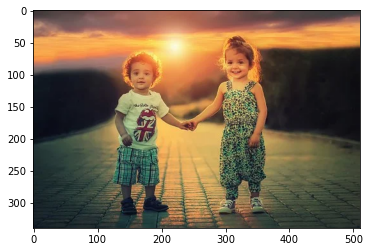

In [5]:
# VISUALIZATION
import matplotlib.pyplot as plt # MATPLOTLIB FOR PLOTTING
import seaborn as sns
%matplotlib inline
plt.imshow(image1)
plt.show()

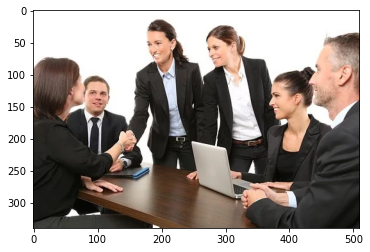

In [6]:
plt.imshow(image2)

In [7]:
# create batch/list of images

image_list = [image1, image2]

In [8]:
# Inferences obtained by passing above images to pretrained model object.

inferences = yolo_model(image_list, size = 640)

In [9]:
inferences

In [10]:
# Print the inference using function
inferences.print()

image 1/2: 340x511 2 persons
image 2/2: 340x510 7 persons, 1 tie, 2 laptops
Speed: 8.1ms pre-process, 237.7ms inference, 5.0ms NMS per image at shape (2, 3, 448, 640)


In [11]:
inferences.show()

In [12]:
# save the detection images on disk
inferences.save()

Saved 2 images to runs/detect/exp3


In [13]:
# we can show image predictions using tensor
inferences.xyxy[0]

tensor([[232.11284,  42.66807, 367.95233, 324.63095,   0.94145,   0.00000],
        [122.97870,  64.52874, 252.51003, 322.44742,   0.90267,   0.00000]])

In [14]:
# Also, we can represent the result with pandas dataframe
inferences.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,232.112839,42.668068,367.952332,324.630951,0.941454,0,person
1,122.978699,64.528740,252.510025,322.447418,0.902672,0,person


## Happy Learning :)